In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
!pip install scipy

In [ ]:
!pip install glob2

##CAPSTON - 1
CLASSIFICATION

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob

In [2]:

# Define the image shape
IMAGESHAPE = (224, 224, 3)

training_data = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train'
testing_data = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/test'


##**Exploratory Data Analysis**

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_sample_images(data_dir, num_samples=5):
    plt.figure(figsize=(15, 5))
    class_names = [class_name for class_name in os.listdir(data_dir) if class_name != '.DS_Store']
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        sample_images = os.listdir(class_dir)[:num_samples]
        for j, image_name in enumerate(sample_images):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)
            plt.subplot(num_samples, len(class_names), i * num_samples + j + 1)
            plt.imshow(image, cmap='gray')
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()




Training Data



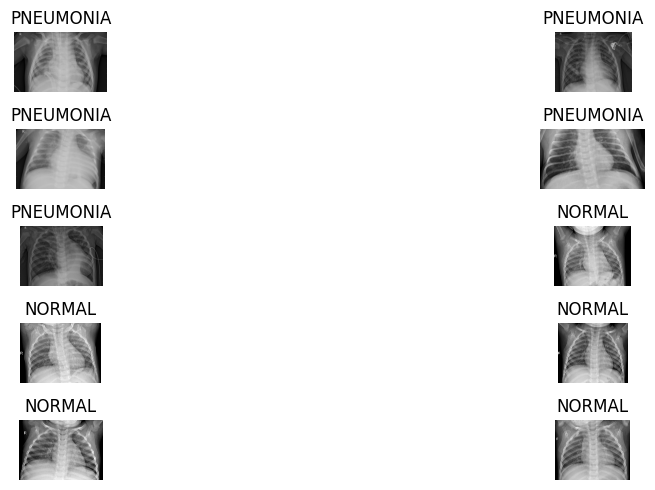

In [ ]:
# Display sample images
#TRAINING DATA
print('\nTraining Data\n')
display_sample_images(training_data)


TESTING DATA



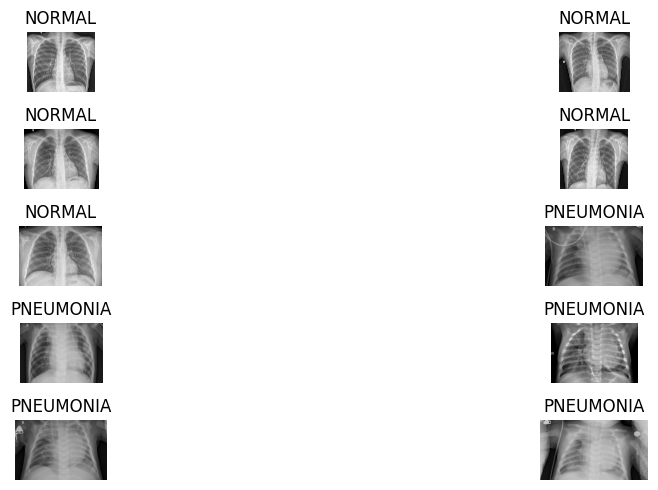

In [ ]:
# Display sample images
#TESTING DATA
print('\nTESTING DATA\n')
display_sample_images(testing_data)

#HISTOGRAM

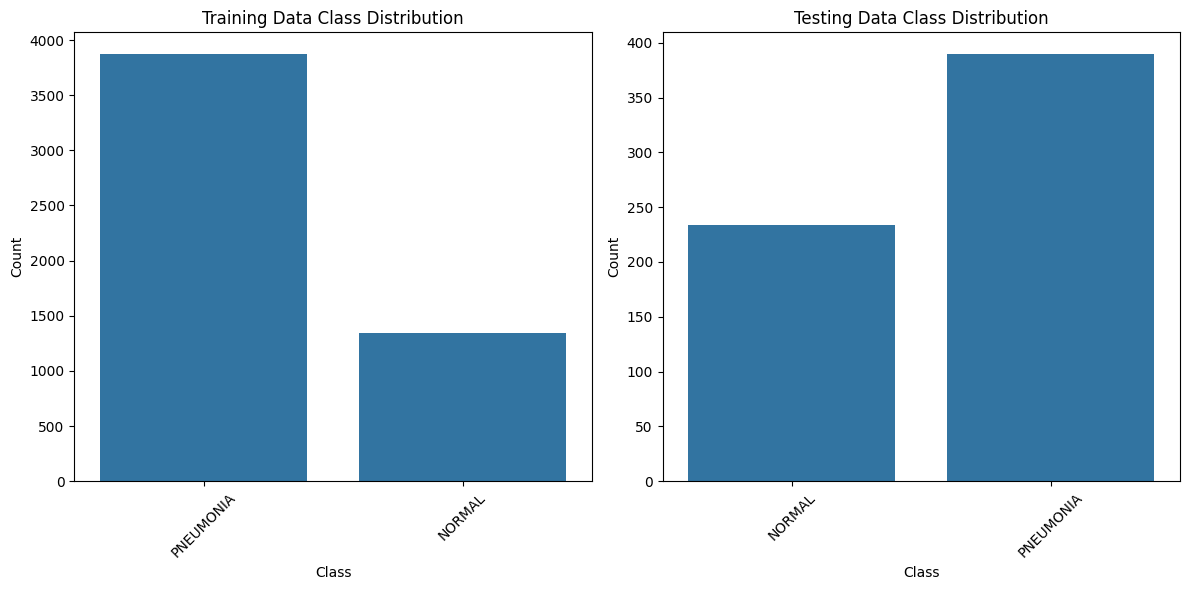

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to get class distribution
def get_class_distribution(data_dir):
    classes = []
    counts = []
    for class_name in os.listdir(data_dir):
        if class_name != '.DS_Store':  # Skip .DS_Store file
            class_dir = os.path.join(data_dir, class_name)
            classes.append(class_name)
            counts.append(len(os.listdir(class_dir)))
    return pd.DataFrame({'Class': classes, 'Count': counts})

# Get class distributions for training and testing data
train_distribution = get_class_distribution(training_data)
test_distribution = get_class_distribution(testing_data)

# Plot class distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=train_distribution, x='Class', y='Count')
plt.title('Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=test_distribution, x='Class', y='Count')
plt.title('Testing Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##FREQUENCY

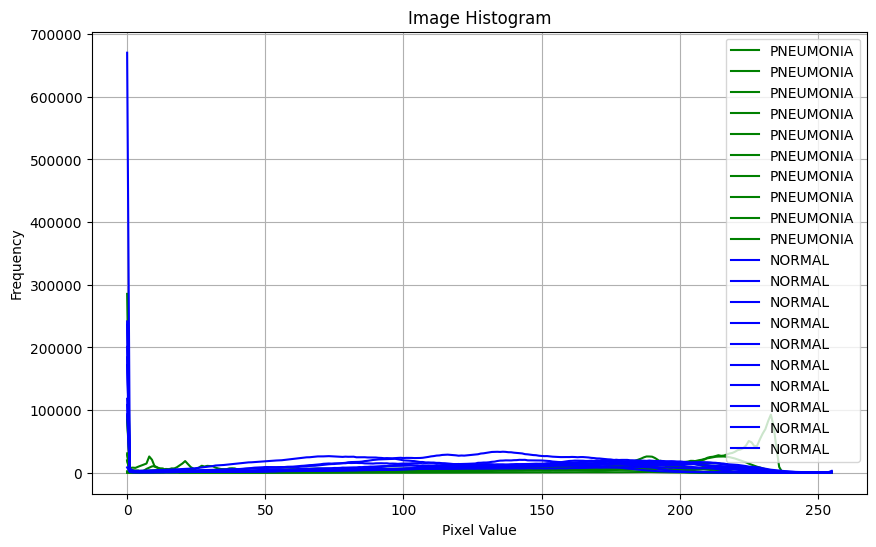

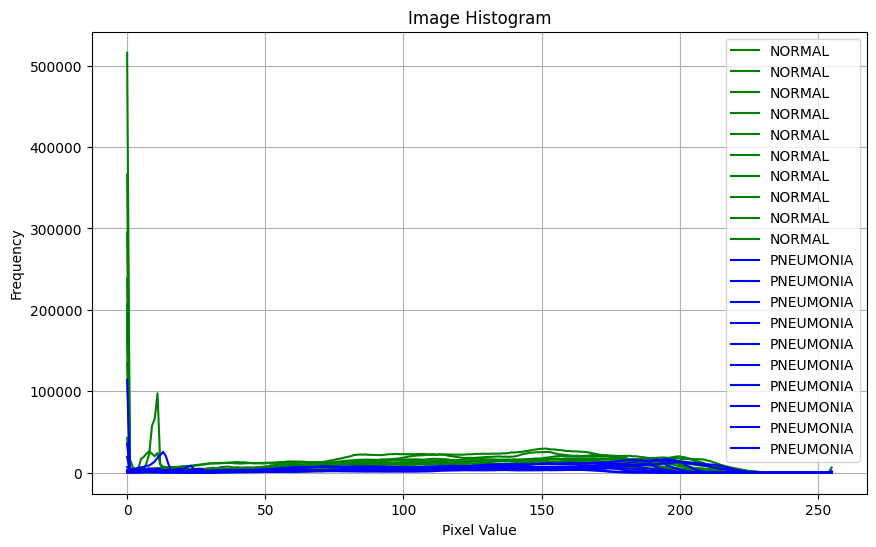

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def plot_histogram(data_dir, num_samples=10):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'green', 'blue', 'orange', 'purple']  # Define a list of colors
    class_color = {}  # Dictionary to map class names to colors

    for idx, class_name in enumerate(os.listdir(data_dir)):
        if class_name != '.DS_Store':  # Skip .DS_Store file
            class_color[class_name] = colors[idx]  # Assign color to class
            class_dir = os.path.join(data_dir, class_name)
            if os.path.isdir(class_dir):
                image_names = os.listdir(class_dir)
                sample_images = random.sample(image_names, min(num_samples, len(image_names)))
                for image_name in sample_images:
                    image_path = os.path.join(class_dir, image_name)
                    # Load image in grayscale
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    # Calculate histogram
                    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
                    # Plot histogram with appropriate color and label
                    plt.plot(histogram, label=class_name, color=class_color[class_name])
    plt.title('Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot histograms for training and testing data directories with a limited number of random samples
plot_histogram(training_data, num_samples=10)
plot_histogram(testing_data, num_samples=10)


#PIE DIAGRAM

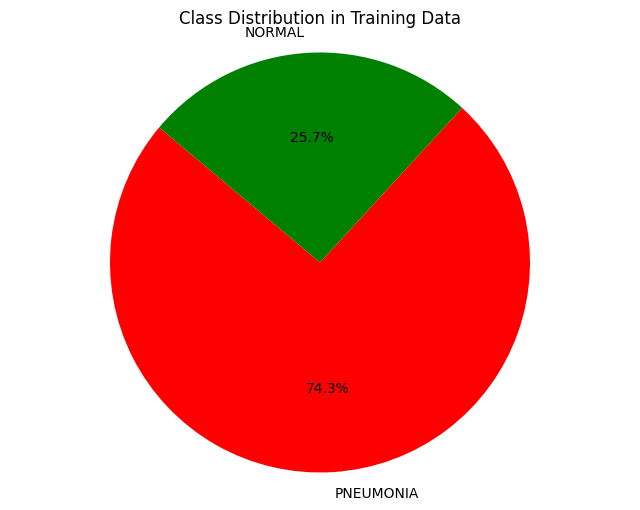

In [ ]:
# Get class distributions for testing data
test_distribution = get_class_distribution(training_data)
colors = ['red','green']
# Plot class distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(test_distribution['Count'], labels=test_distribution['Class'], autopct='%1.1f%%', startangle=140,colors = colors)
plt.title('Class Distribution in Training Data')
plt.axis('equal')
plt.show()

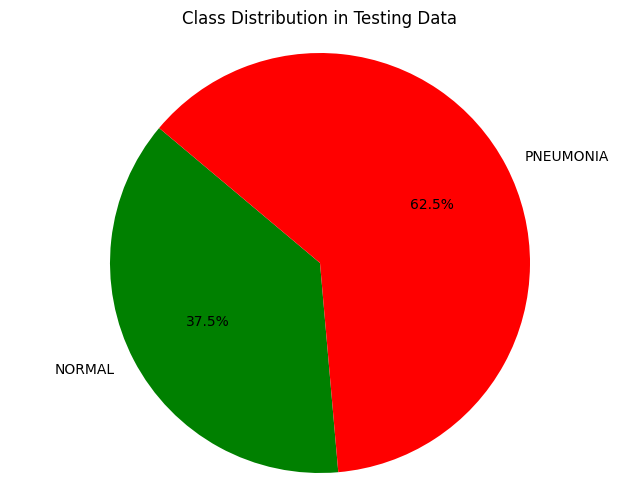

In [ ]:
# Get class distributions for testing data
test_distribution = get_class_distribution(testing_data)
colors = ['green','red']
# Plot class distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(test_distribution['Count'], labels=test_distribution['Class'], autopct='%1.1f%%', startangle=140,colors = colors)

plt.title('Class Distribution in Testing Data')
plt.axis('equal')
plt.show()


#Box Plot

Error processing image '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/PNEUMONIA/.DS_Store': cannot identify image file '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/PNEUMONIA/.DS_Store'
Error processing image '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/NORMAL/.DS_Store': cannot identify image file '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/NORMAL/.DS_Store'


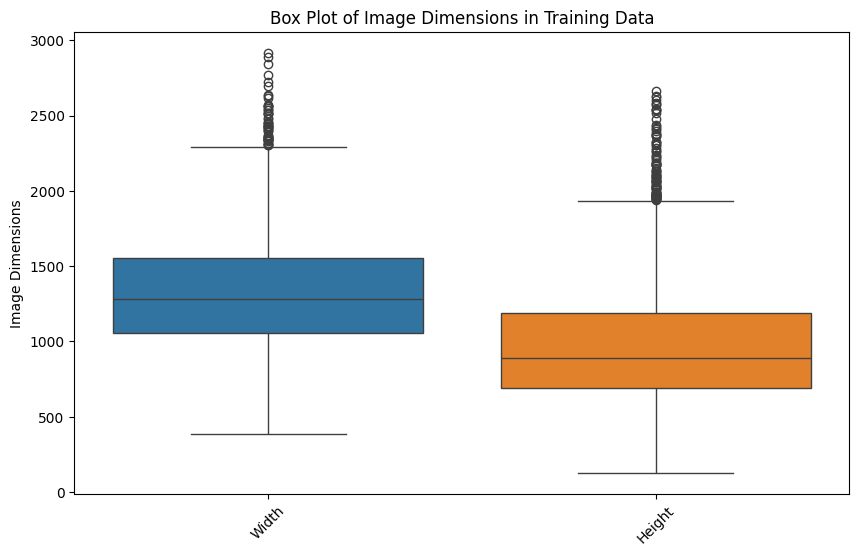

In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_image_dimensions(data_dir):
    image_dimensions = []
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if class_name != '.DS_Store' and os.path.isdir(class_dir):  # Skip .DS_Store file and only process directories
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    with Image.open(image_path) as img:
                        width, height = img.size
                        image_dimensions.append({'Class': class_name, 'Width': width, 'Height': height})
                except Exception as e:
                    print(f"Error processing image '{image_path}': {e}")
    return pd.DataFrame(image_dimensions)

train_image_dimensions = get_image_dimensions(training_data)

# Plot box plot of image dimensions using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_image_dimensions[['Width', 'Height']], orient='v')
plt.title('Box Plot of Image Dimensions in Training Data')
plt.ylabel('Image Dimensions')
plt.xticks(rotation=45)
plt.show()


#Heatmap

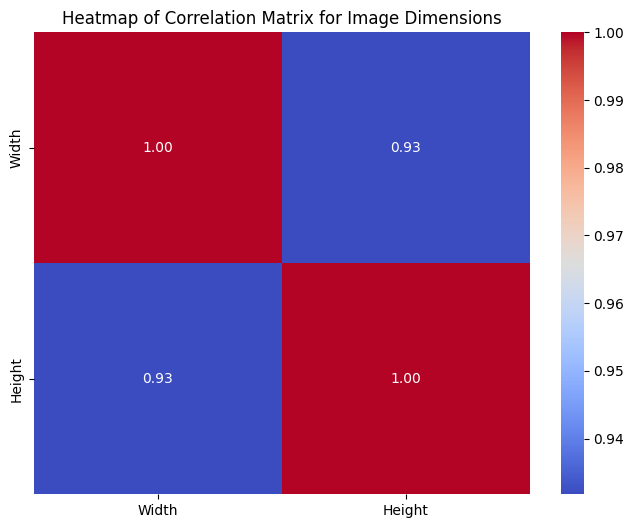

In [ ]:
# Convert image dimensions to DataFrame for heatmap
train_image_df = pd.DataFrame(train_image_dimensions, columns=['Width', 'Height'])

# Calculate correlation matrix
correlation_matrix = train_image_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix for Image Dimensions')
plt.show()


#Violin Plot

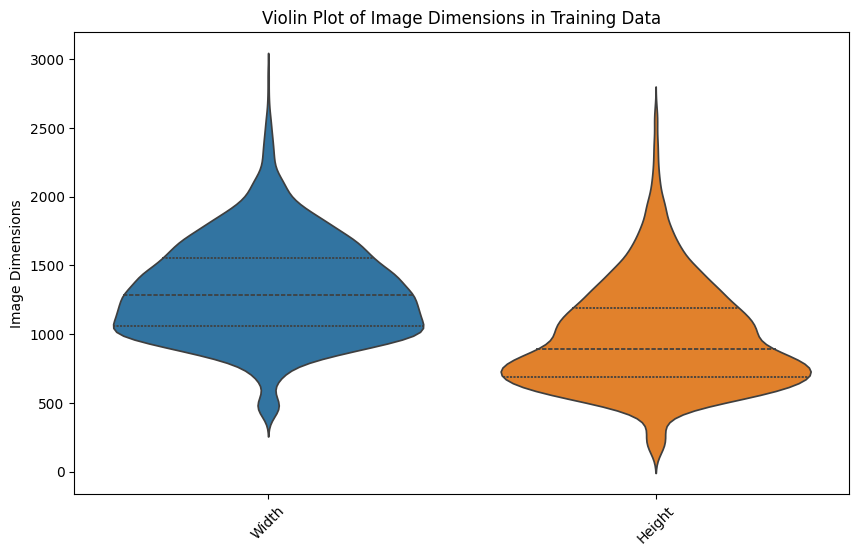

In [ ]:
# Plot violin plot of image dimensions using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_image_dimensions, orient='v', inner='quartiles')
plt.title('Violin Plot of Image Dimensions in Training Data')
plt.ylabel('Image Dimensions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Load the pre-trained VGG16 model with GPU support
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze all layers in the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Get the number of classes from the training data directory
classes = glob('/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train/*')

In [ ]:
# Add a Flatten layer and a Dense layer for classification
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(2, activation='softmax')(flatten_layer)  # Assuming binary classification


In [ ]:
# Create the final model
final_model = Model(inputs=vgg_model.input, outputs=prediction)


In [ ]:
# Compile the model
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training and testing data using flow_from_directory
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train',
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.


In [ ]:
# Define data directories
train_dir = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/train'
test_dir = '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/test'


In [ ]:
# Create TensorFlow datasets for efficient data loading and processing
batch_size = 32
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)



test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/5
163/163 [==============================] - 3228s 20s/step - loss: 0.2367 - accuracy: 0.9170 - val_loss: 0.4539 - val_accuracy: 0.8510
Epoch 2/5
163/163 [==============================] - 3186s 20s/step - loss: 0.1386 - accuracy: 0.9492 - val_loss: 0.2588 - val_accuracy: 0.9199
Epoch 3/5
163/163 [==============================] - 3240s 20s/step - loss: 0.1076 - accuracy: 0.9624 - val_loss: 0.2955 - val_accuracy: 0.9071
Epoch 4/5
163/163 [==============================] - 3241s 20s/step - loss: 0.0803 - accuracy: 0.9695 - val_loss: 0.3842 - val_accuracy: 0.8974
Epoch 5/5
163/163 [==============================] - 3190s 20s/step - loss: 0.0889 - accuracy: 0.9674 - val_loss: 0.3666 - val_accuracy: 0.9038


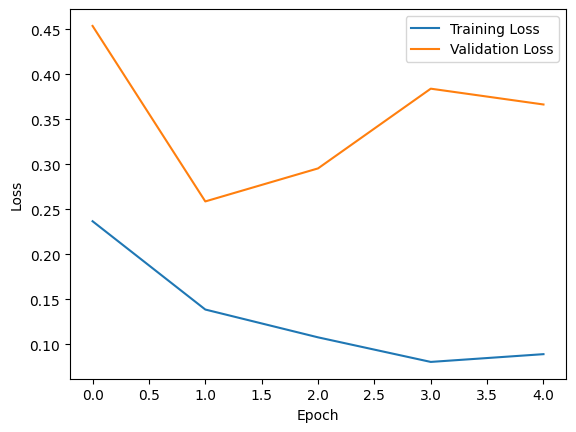

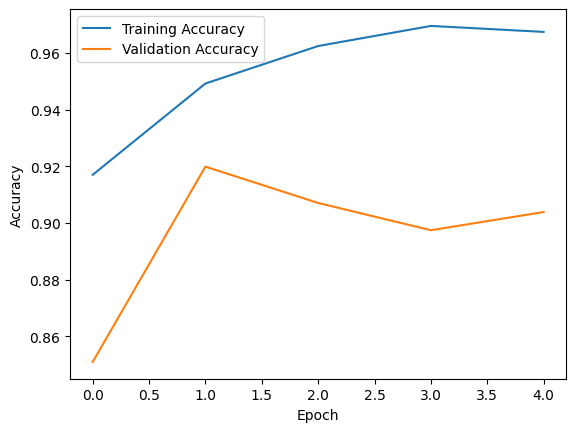

In [ ]:
# Train the model with optimized data loading and processing
history = final_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
final_model.save('/content/drive/MyDrive/Machine Learning/Project/our_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the model with the full path
model = load_model('/content/drive/MyDrive/Machine Learning/Project/our_model.h5')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/Machine Learning/Project/sample_images/NORMAL2-IM-1430-0001.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_data = preprocess_input(img_array)

# Make predictions
prediction = model.predict(img_data)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction)

# Define class labels
class_labels = ['Normal', 'Pneumonia']

# Print the prediction result
if predicted_class == 0:
    print('Person is not affected.')
else:
    print('Person is affected with Pneumonia.')

# Print the confidence level
print(f'Confidence: {prediction[0][predicted_class]}')

# Print all class probabilities
for i, prob in enumerate(prediction[0]):
    print(f'{class_labels[i]}: {prob}')


1/1 [==============================] - 1s 728ms/step
Person is not affected.
Confidence: 1.0
Normal: 1.0
Pneumonia: 3.1516161360461314e-29


In [ ]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the model with the full path
model = load_model('/content/drive/MyDrive/Machine Learning/Project/our_model.h5')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/Machine Learning/Project/sample_images/person1946_bacteria_4874.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_data = preprocess_input(img_array)

# Make predictions
prediction = model.predict(img_data)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction)

# Define class labels
class_labels = ['Normal', 'Pneumonia']

# Print the prediction result
if predicted_class == 0:
    print('Person is not affected.')
else:
    print('Person is affected with Pneumonia.')

# Print the confidence level
print(f'Confidence: {prediction[0][predicted_class]}')

# Print all class probabilities
for i, prob in enumerate(prediction[0]):
    print(f'{class_labels[i]}: {prob}')


1/1 [==============================] - 1s 1s/step
Person is affected with Pneumonia.
Confidence: 1.0
Normal: 0.0
Pneumonia: 1.0


##CAPSTON - 2
STATISTICS

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions for the test set
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine Learning/Project/chest_xray/chest_xray/test',
    target_size=(224, 224),
    batch_size=1,  # Set batch size to 1 for generating predictions for each sample separately
    class_mode='categorical',
    shuffle=False  # Ensure the order of predictions matches the order of ground truth labels
)

predictions = final_model.predict(test_set)

# Convert predictions to class labels (0 or 1)
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels
true_labels = test_set.classes

# Get class names
class_names = list(test_set.class_indices.keys())

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)


Found 624 images belonging to 2 classes.
624/624 [==============================] - 358s 574ms/step
              precision    recall  f1-score   support

      NORMAL       0.94      0.79      0.86       234
   PNEUMONIA       0.89      0.97      0.93       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.91      0.90      0.90       624



1. **Precision, Recall, and F1-score by Class**: We can assess how well the model performs for each individual class. In this case, the model achieves high precision, recall, and F1-score for both the "NORMAL" and "PNEUMONIA" classes. This suggests that the model is effective at correctly identifying instances of both classes.

2. **Support**: Understanding the support (i.e., the number of instances) for each class helps provide context to the performance metrics. It shows the distribution of classes within the test dataset.

3. **Overall Accuracy**: The overall accuracy of 90% indicates the proportion of correctly classified instances across all classes. It provides a high-level summary of the model's performance but should be interpreted in conjunction with other metrics, especially when dealing with imbalanced datasets.

4. **Macro Average Metrics**: The macro average precision, recall, and F1-score provide an average performance measure across all classes, treating each class equally. This can be useful for assessing the model's overall performance without considering class imbalance.

5. **Weighted Average Metrics**: The weighted average precision, recall, and F1-score consider the class distribution when calculating the average, giving more weight to classes with larger support. This provides a more accurate representation of the model's performance across all classes, especially in the presence of class imbalance.

Overall, the interpretation of the classification report allows us to gauge the model's effectiveness in classifying instances, identify potential areas for improvement, and make informed decisions about model deployment and further optimization.

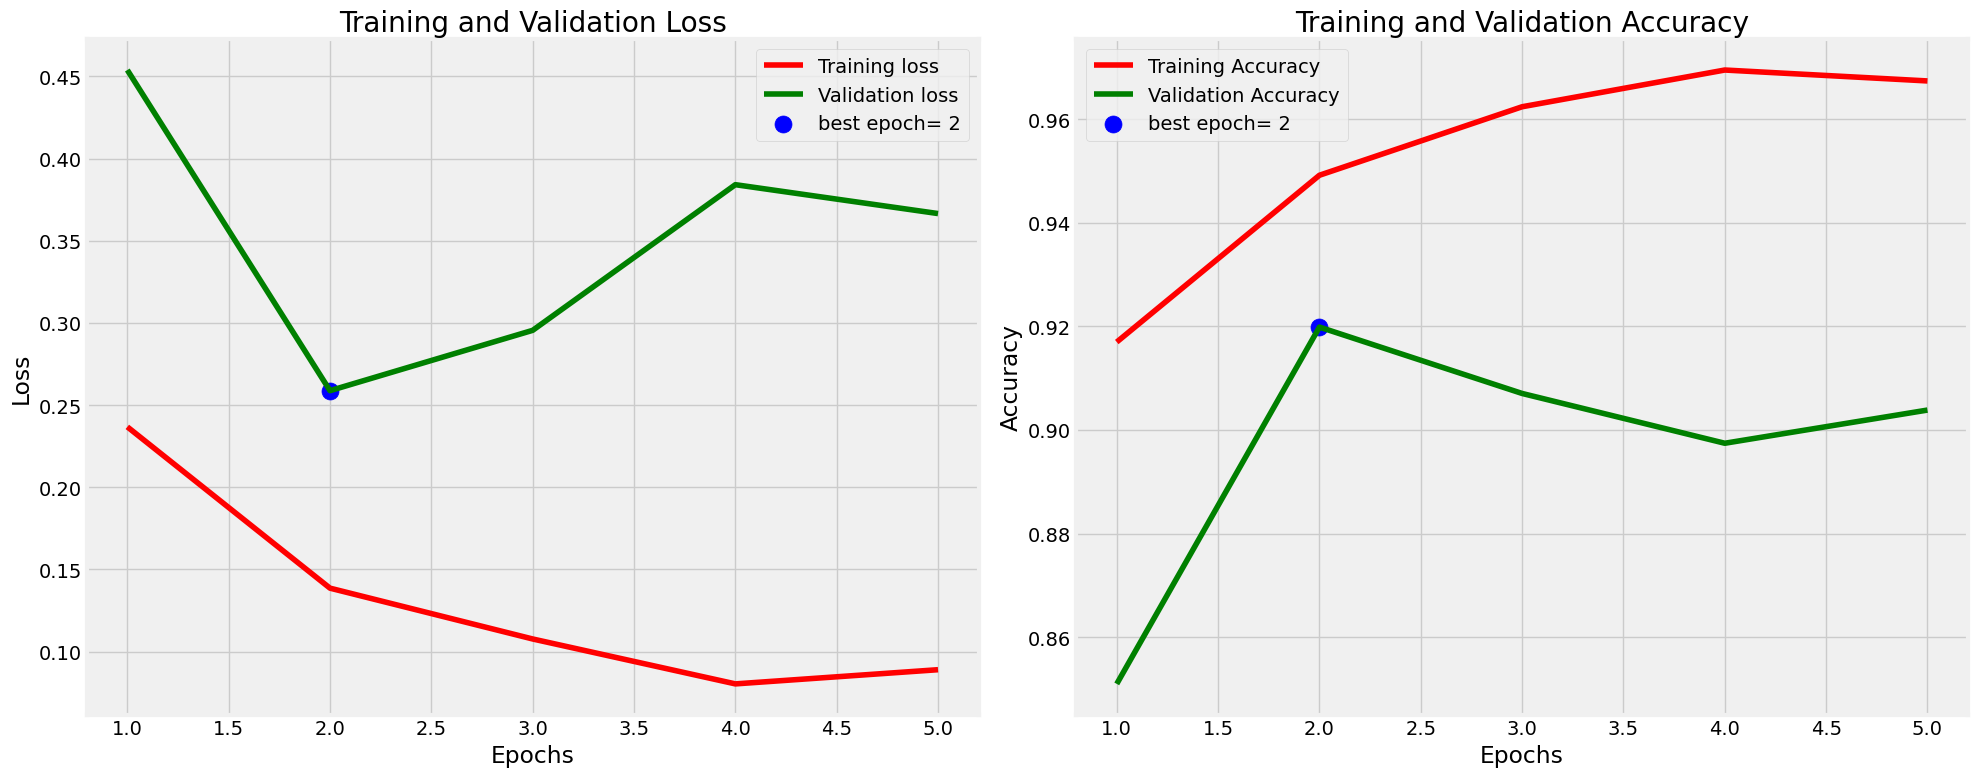

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming history is defined and contains training history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = range(1, len(tr_acc) + 1)
loss_label = f'best epoch= {index_loss + 1}'
acc_label = f'best epoch= {index_acc + 1}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
